<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling II
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados** 

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [8]:
# ler o arquivo estados-bruto.xml, utilize o xml parser chamado lxml

from bs4 import BeautifulSoup


NOME_ARQUIVO_FONTE = 'estados-bruto.xml'

with open(NOME_ARQUIVO_FONTE) as xml:
  fonte = BeautifulSoup(xml, "lxml")

/usr/local/lib/python3.9/dist-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


In [9]:
# visualize os resultados

fonte

<?xml version="1.0" encoding="utf-8" ?><html><body><estados>
<estado>
<id>1</id>
<nome>ACRE</nome>
<idcapital>16</idcapital>
<sigla>AC</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>2</id>
<nome>ALAGOAS</nome>
<idcapital>68</idcapital>
<sigla>AL</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>3</id>
<nome>AMAPA</nome>
<idcapital>131</idcapital>
<sigla>AP</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>4</id>
<nome>AMAZONAS</nome>
<idcapital>178</idcapital>
<sigla>AM</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>5</id>
<nome>BAHIA</nome>
<idcapital>536</idcapital>
<sigla>BA</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>6</id>
<nome>CEARA</nome>
<idcapital>676</idcapital>
<sigla>CE</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>7</id>
<nome>DISTRITO FEDERAL</nome>
<idcapital>916</idcapital>
<sigla>DF</sigla>
<regiao>CENTRO-OESTE</regiao>
</estado>
<estado>
<id>8</id>
<nome>ESPIRITO SANTO</nome>
<idcapital>879</idcapital>
<sigla>ES</sigla

In [10]:
# manipule os dados

estados = fonte.find_all("nome")
estados = [estado.string for estado in estados]

siglas = fonte.find_all("sigla")
siglas = [sigla.string for sigla in siglas]

regioes = fonte.find_all("regiao")
regioes = [regiao.string for regiao in regioes]

print(estados)
print(siglas)
print(regioes)

['ACRE', 'ALAGOAS', 'AMAPA', 'AMAZONAS', 'BAHIA', 'CEARA', 'DISTRITO FEDERAL', 'ESPIRITO SANTO', 'GOIAS', 'MARANHAO', 'MATO GROSSO', 'MATO GROSSO DO SUL', 'PARA', 'PARAIBA', 'PARANA', 'PERNAMBUCO', 'PIAUI', 'RIO DE JANEIRO', 'RIO GRANDE DO NORTE', 'RIO GRANDE DO SUL', 'RONDONIA', 'RORAIMA', 'SANTA CATARINA', 'SAO PAULO', 'SERGIPE', 'TOCANTINS', 'MINAS GERAIS']
['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT', 'MS', 'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO', 'RR', 'SC', 'SP', 'SE', 'TO', 'MG']
['NORTE', 'NORDESTE', 'NORTE', 'NORTE', 'NORDESTE', 'NORDESTE', 'CENTRO-OESTE', 'SUDESTE', 'CENTRO-OESTE', 'NORDESTE', 'CENTRO-OESTE', 'CENTRO-OESTE', 'NORTE', 'NORDESTE', 'SUL', 'NORDESTE', 'NORDESTE', 'SUDESTE', 'NORDESTE', 'SUL', 'NORTE', 'NORTE', 'SUL', 'SUDESTE', 'NORDESTE', 'NORTE', 'SUDESTE']


In [11]:
# escrever o conteudo extraido no arquivo estados-limpo.csv separados por ;

import pandas as pd

NOME_ARQUIVO_DESTINO = 'estados-limpo.csv'

# criando um dicionário e convertendo em dataframe
estados_br = pd.DataFrame({
    "estado": estados,
    "sigla": siglas,
    "regiao": regioes,
})

estados_br.to_csv(NOME_ARQUIVO_DESTINO, index=False, sep=";")

### **1.2. Cidades** 

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [13]:
# ler o arquivo cidades-bruto.csv

import pandas as pd

NOME_ARQUIVO_FONTE = 'cidades-bruto.csv'

cidades_br = pd.read_csv(NOME_ARQUIVO_FONTE)

In [14]:
cidades_br = cidades_br.query('Censo == 2010')[['UF', 'nome', 'Pop_est_2009', 'PIB', 'PIB_percapita']]

In [15]:
cidades_br = cidades_br.rename(
    columns={
      "UF": "estado", 
      "nome": "cidade", 
      "Pop_est_2009": "populacao", 
      "PIB": "pib", 
      "PIB_percapita": "pib_percapita"
      }
)

In [16]:
cidades_br.head(3)

,estado,cidade,populacao,pib,pib_percapita
0,BAHIA,Tremedal,18433,5.788399e+04,3140.239990
1,RIO GRANDE DO SUL,Turuçu,4000,4.572388e+04,11430.969727
2,ESPIRITO SANTO,Vitória,320156,1.978263e+07,61790.589844


In [17]:
cidades_br.shape

(5555, 5)

In [18]:
cidades_br.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5555 entries, 0 to 5565
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   estado         5555 non-null   object 
 1   cidade         5555 non-null   object 
 2   populacao      5555 non-null   int64  
 3   pib            5555 non-null   float64
 4   pib_percapita  5555 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 260.4+ KB


In [19]:
cidades_br.describe().T

,count,mean,std,min,25%,50%,75%,max
populacao,5555.0,34415.147795,2.019830e+05,837.000000,5337.000000,11170.000000,23231.000000,1.103759e+07
pib,5555.0,582567.374885,6.352060e+06,5770.282227,38390.367188,80491.531250,205672.250000,3.893172e+08
pib_percapita,5555.0,10981.193570,1.215933e+04,1929.969971,4516.020020,8391.370117,13317.935059,3.608158e+05


In [20]:
cols = cidades_br.select_dtypes(include=[object]).columns
cidades_br[cols] = cidades_br[cols].apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))
     

In [21]:
# escrever o conteudo extraido no arquivo cidades-limpo.csv separados por ;

NOME_ARQUIVO_DESTINO = 'cidades-limpo.csv'

cidades_br.to_csv(NOME_ARQUIVO_DESTINO, index=False)

### **1.3. Brasil** 

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-bruto.csv` com os dados do arquivo `cidades-bruto.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [22]:
# solução do exercício 1.3
brasil = pd.merge(left=cidades_br, right=estados_br, on='estado', how='inner')

In [23]:
brasil.head()

,estado,cidade,populacao,pib,pib_percapita,sigla,regiao
0,BAHIA,Tremedal,18433,57883.992188,3140.239990,BA,NORDESTE
1,BAHIA,Maetinga,7884,23558.447266,2988.129883,BA,NORDESTE
2,BAHIA,Ibirapua,7893,74997.406250,9501.759766,BA,NORDESTE
3,BAHIA,Governador Mangabeira,20668,92903.820312,4495.060059,BA,NORDESTE
4,BAHIA,Ibitita,19410,62366.886719,3213.129883,BA,NORDESTE


In [24]:
brasil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5555 entries, 0 to 5554
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   estado         5555 non-null   object 
 1   cidade         5555 non-null   object 
 2   populacao      5555 non-null   int64  
 3   pib            5555 non-null   float64
 4   pib_percapita  5555 non-null   float64
 5   sigla          5555 non-null   object 
 6   regiao         5555 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 347.2+ KB


In [25]:
NOME_ARQUIVO_DESTINO = 'brasil.csv'

brasil.to_csv(NOME_ARQUIVO_DESTINO, index=False)

---

## 2\. Data Analytics

### **2.1. DataFrame** 

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [26]:
brasil_df = pd.read_csv('brasil.csv', encoding='utf-8')

brasil_df.head()

,estado,cidade,populacao,pib,pib_percapita,sigla,regiao
0,BAHIA,Tremedal,18433,57883.992188,3140.239990,BA,NORDESTE
1,BAHIA,Maetinga,7884,23558.447266,2988.129883,BA,NORDESTE
2,BAHIA,Ibirapua,7893,74997.406250,9501.759766,BA,NORDESTE
3,BAHIA,Governador Mangabeira,20668,92903.820312,4495.060059,BA,NORDESTE
4,BAHIA,Ibitita,19410,62366.886719,3213.129883,BA,NORDESTE


### **2.2. Analise** 

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [27]:

top10_cidades_populosas = brasil_df[['cidade', 'populacao', 'sigla', 'regiao']].\
    sort_values('populacao', ascending=False)

# checagem:
top10_cidades_populosas.head(10)   

,cidade,populacao,sigla,regiao
3271,Sao Paulo,11037593,SP,SUDESTE
4504,Rio de Janeiro,6186710,RJ,SUDESTE
44,Salvador,2998056,BA,NORDESTE
5554,Brasilia,2606885,DF,CENTRO-OESTE
4221,Fortaleza,2505552,CE,NORDESTE
1735,Belo Horizonte,2452617,MG,SUDESTE
4849,Curitiba,1851215,PR,SUL
3720,Manaus,1738641,AM,NORTE
2435,Recife,1561659,PE,NORDESTE
2624,Belem,1437600,PA,NORTE


 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [28]:
regiao_nordeste = brasil_df.query('regiao == "NORDESTE" ')
menores_pib_nordeste = regiao_nordeste[['cidade', 'pib_percapita', 'sigla']].\
    sort_values(by=['pib_percapita'], ascending=True)

# checagem:
menores_pib_nordeste.head(5)

,cidade,pib_percapita,sigla
4464,Sao Vicente Ferrer,1929.969971,MA
4359,Cajapio,2203.830078,MA
1848,Dom Inocencio,2358.239990,PI
4483,Timbiras,2368.159912,MA
4380,Axixa,2416.969971,MA


 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [29]:
brasil_df.estado.drop_duplicates()


0                     BAHIA
416       RIO GRANDE DO SUL
912          ESPIRITO SANTO
990            MINAS GERAIS
1843                  PIAUI
2067                  GOIAS
2313             PERNAMBUCO
2496                   PARA
2639                SERGIPE
2714              SAO PAULO
3356                PARAIBA
3579              TOCANTINS
3718               AMAZONAS
3780         SANTA CATARINA
4073                  CEARA
4257                RORAIMA
4272               MARANHAO
4488         RIO DE JANEIRO
4580            MATO GROSSO
4718                 PARANA
5117                ALAGOAS
5219     MATO GROSSO DO SUL
5297                   ACRE
5319    RIO GRANDE DO NORTE
5486               RONDONIA
5538                  AMAPA
5554       DISTRITO FEDERAL
Name: estado, dtype: object

In [30]:
estado_SP = brasil_df.query('sigla == "SP" ')

maiores_pib_SP = estado_SP[['cidade', 'estado', 'pib']].sort_values(
    'pib', ascending=False
)

# checagem:
maiores_pib_SP.head(15)

,cidade,estado,pib
3271,Sao Paulo,SAO PAULO,389317152.0
3223,Guarulhos,SAO PAULO,32473828.0
3340,Campinas,SAO PAULO,31654720.0
3106,Osasco,SAO PAULO,31616452.0
2810,Sao Bernardo do Campo,SAO PAULO,28935768.0
3344,Barueri,SAO PAULO,26908070.0
2768,Santos,SAO PAULO,22546134.0
2994,Sao Jose dos Campos,SAO PAULO,22018042.0
3014,Jundiai,SAO PAULO,16585137.0
2816,Santo Andre,SAO PAULO,14709603.0


 - Qual é o PIB do estado de Santa Catarina?

In [31]:
estado_SC = brasil_df.query('sigla == "SC" ')
PIB_SC = estado_SC['pib'].mean()


print(f'PIB de SC: {PIB_SC}')

PIB de SC: 443024.7670715125


 - Qual é o população da região sul?

In [35]:
regiao_sul = brasil_df.query('regiao == "SUL"')
populacao_sul = regiao_sul['populacao'].sum()

print(f"A população da região sul é de {populacao_sul} habitantes")

A população da região sul é de 27719118 habitantes


 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [38]:
municipios_MS = brasil_df.query('sigla == "MS"')

pib_percapita_medio_MS = municipios_MS['pib_percapita'].mean()

print(f' O PIB per capita médio das cidades do Mato Grosso do Sul: {pib_percapita_medio_MS}')

 O PIB per capita médio das cidades do Mato Grosso do Sul: 14458.896859975644


 - Qual é a população do Brasil?

In [40]:
populacao_total_BR = brasil_df['populacao'].sum()

print(f'População do Brasil: {populacao_total_BR} pessoas')

População do Brasil: 191176146 pessoas


### **2.3. Visualização** 

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

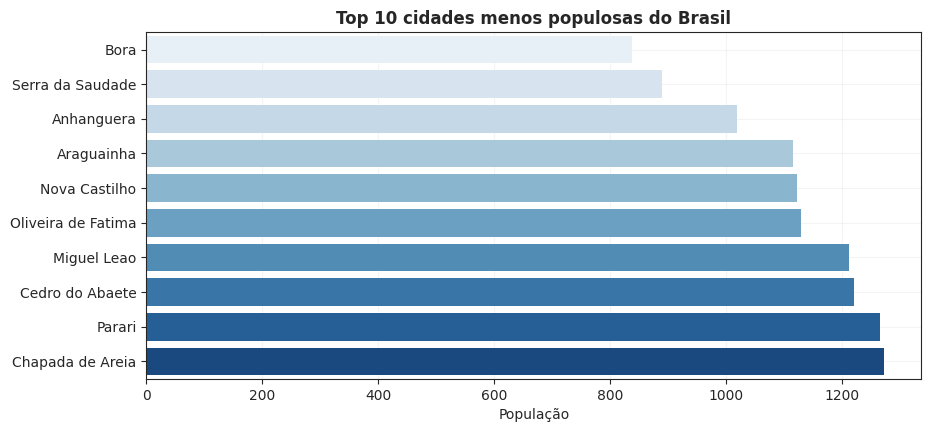

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

cidades_menos_populosas_BR = brasil_df[['cidade', 'populacao']].\
    sort_values('populacao', ascending=True).head(10)

with sns.axes_style('ticks'):
  fig, ax = plt.subplots(figsize=(10,4.5))
  sns.barplot(
      data = cidades_menos_populosas_BR,
      x = 'populacao',
      y = 'cidade',
      palette = 'Blues',
      lw=0
  )
  plt.grid(alpha=0.2)
  plt.title('Top 10 cidades menos populosas do Brasil', weight='bold', size=12)
  plt.xlabel('População', size=10)
  plt.ylabel('')

 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

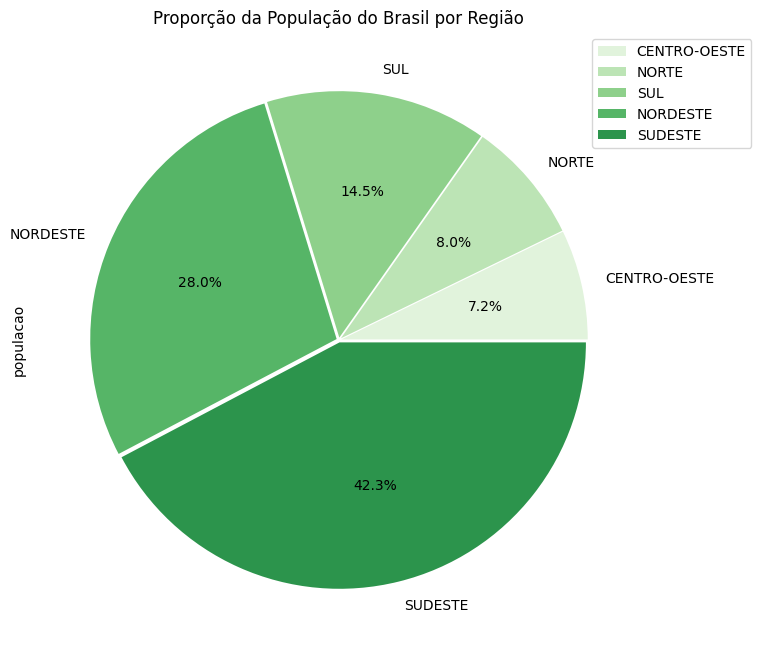

In [45]:
populacao_por_regiao = brasil_df[['regiao', 'populacao']].groupby('regiao').sum()\
    .sort_values('populacao', ascending=True)

palette_color = sns.color_palette('Greens')
explode = [0.01, 0.01, 0.01, 0.01, 0.01]

populacao_por_regiao.plot.pie(y='populacao',
                              title="Proporção da População do Brasil por Região",
                              figsize=(16,8),
                              explode = explode,
                              autopct='%1.1f%%',
                              colors=palette_color
).legend(bbox_to_anchor=(0.9, 1));